# Explore weather trends

In this report, we are going to visualize temperature trends for global and Shiraz (a local city).


## Data Extraction

CSV dataset that is used in the python code below is extracted from the online database using SQL query below, a simple SELECT with an inner join to merge the two global temperature and city temperature table.

```sql
SELECT c.year,c.avg_temp as shiraz_temp,g.avg_temp as global_temp FROM city_data c JOIN global_data g on c.year=g.year where c.city='Shiraz'
```

## Data Visualization


Now that we've got the data, it's time to visualize it using python. First of all, we import pandas to read the dataset and matplotlib.pyplot for drawing line chart.

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt

In this part, we are going to define a function to calculate moving average based on the input arguments.

In [2]:
def moving_average_calculator(data_frame, coloum_index, moving_count):
    """
    calculate moving average on a given data_frame and coloum_index by moving_count
    """
    averages = []
    for index in range(len(data_frame)):
        avg = sum(data_frame.iloc[index - moving_count: index, coloum_index])/moving_count
        averages.append(avg)
    return averages

Reading dataset using read_csv function of pandas module then setting moving average that is going to be used in calculations.

In [3]:
DATA_FRAME = read_csv("shiraz_vs_global.csv")

In [4]:
MOVING_AVERAGE = 10

Calculating moving average for Shiraz and global temperature.

In [5]:
SHIRAZ_TEMP_AVG = moving_average_calculator(DATA_FRAME, 1, MOVING_AVERAGE)
GLOBAL_TEMP_AVG = moving_average_calculator(DATA_FRAME, 2, MOVING_AVERAGE)

And finally, drawing the line chart.

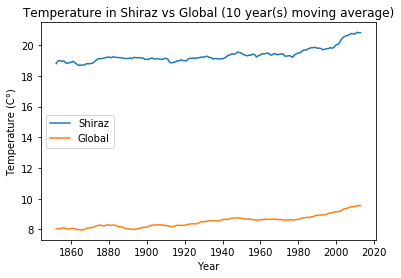

In [6]:
plt.plot(DATA_FRAME['year'].iloc[MOVING_AVERAGE:], SHIRAZ_TEMP_AVG[MOVING_AVERAGE:], label='Shiraz')
plt.plot(DATA_FRAME['year'].iloc[MOVING_AVERAGE:], GLOBAL_TEMP_AVG[MOVING_AVERAGE:], label='Global')
plt.xlabel("Year")
plt.ylabel("Temperature (C°)")
plt.legend(loc=6)
plt.title("Temperature in Shiraz vs Global ({} year(s) moving average)".format(MOVING_AVERAGE))
plt.show()

## Observation


First noticeable note in the chart is that Shiraz temperature is almost as 2.5 times of global temperature and it has almost maintained the difference even in the last fifty years that temperature changes are more considerable.

Both Shiraz and global shows temperature increase over the last 150 years, however, Shiraz shows more persistent temperature until 1940 while global shows it until 1920. there is a minor temperature increase in the 1920s to 1940s where it is hidden in Shiraz.

The most noticeable change is in the last fifty years that could be seen within a glimpse. Both Shiraz and global shows a major temperature increase in their stats. however, Shiraz temperature change is almost a little higher than usual difference between itself and global.